<a href="https://colab.research.google.com/github/abhikonkal/Algorithms/blob/main/Main_BT20CSE069_Konkal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
from google.colab.patches import cv2_imshow



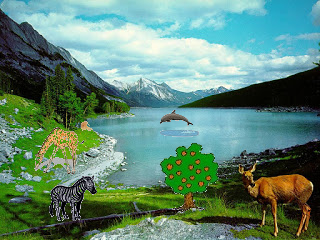

In [8]:
source_image = cv2.imread('img61.jpg')
overlay_image = cv2.imread('Sample_Image.jpg')

#Maksing
overlay_gray = cv2.cvtColor(overlay_image, cv2.COLOR_BGR2GRAY)
_, overlay_mask = cv2.threshold(overlay_gray, 200, 255, cv2.THRESH_BINARY)
overlay_inv_mask = cv2.bitwise_not(overlay_mask)

# Extract background and foreground
background = cv2.bitwise_and(source_image, source_image, mask=overlay_mask)
foreground = cv2.bitwise_and(overlay_image, overlay_image, mask=overlay_inv_mask)

# composite image
composite_image = cv2.add(background, foreground)


# plt.title('Composite Image')
# plt.imshow(composite_image)
cv2_imshow(composite_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


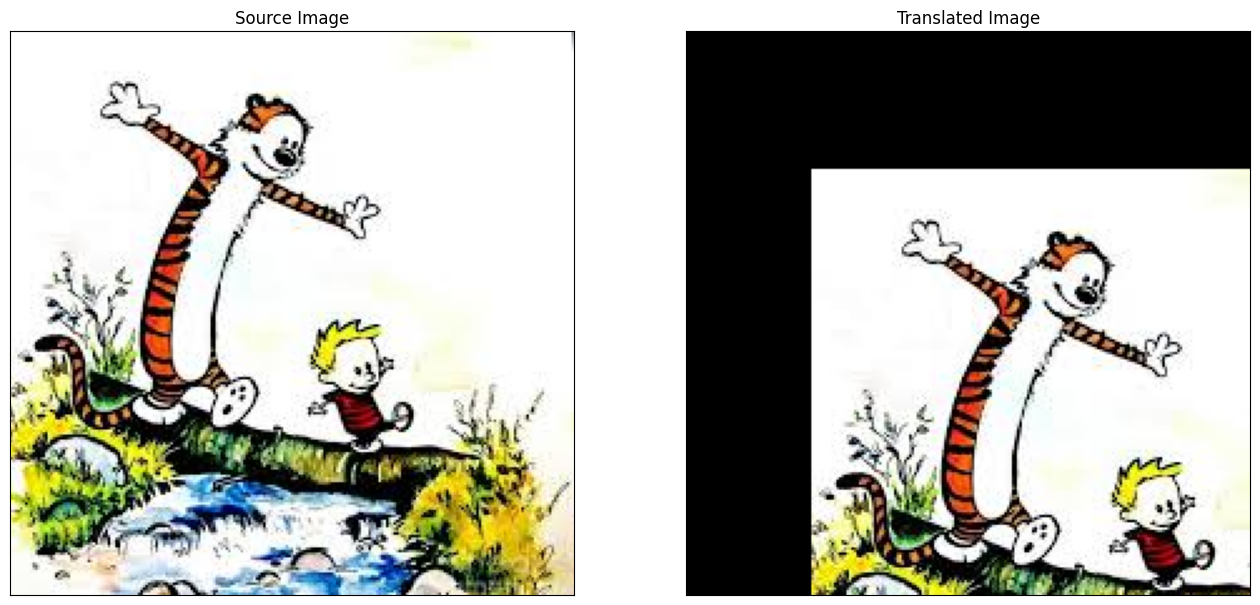

In [16]:

source_image = plt.imread("image_c.jpeg")
shift_x = 50
shift_y = 55
translated_image = np.zeros_like(source_image)
height, width = source_image.shape[:2]
for y in range(height):
    for x in range(width):
        new_x = x + shift_x
        new_y = y + shift_y

        if 0 <= new_x < width and 0 <= new_y < height:
            translated_image[new_y, new_x] = source_image[y, x]


plt.figure(figsize=(16, 12))
plt.subplot(1, 2, 1)
plt.imshow(source_image)
plt.title('Source Image')
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(translated_image)
plt.title('Translated Image')
plt.xticks([])
plt.yticks([])

plt.show()


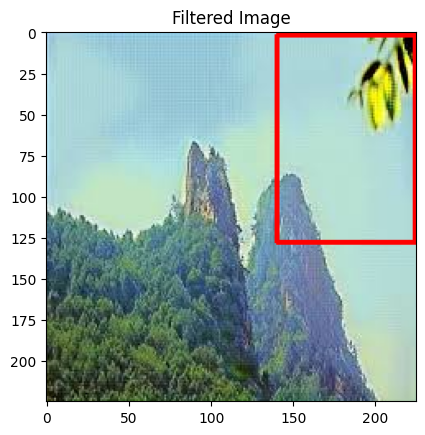

In [22]:


input_image = Image.open('hills.jpeg')
filter_image = Image.open('template.png')


input_gray = np.array(input_image.convert('L'))
filter_gray = np.array(filter_image.convert('L'))


filter_height, filter_width = filter_gray.shape
input_height, input_width = input_gray.shape

min_difference = float('inf')
top_left = bottom_right = (0, 0)


for i in range(input_height - filter_height):
    for j in range(input_width - filter_width):
        temp = input_gray[i:i+filter_height, j:j+filter_width]
        difference = np.square(filter_gray - temp).mean()

        if difference < min_difference:
            min_difference = difference
            top_left = (j, i)
            bottom_right = (j+filter_width, i+filter_height)


input_image = np.array(input_image)

cv2.rectangle(input_image, tuple(top_left), tuple(bottom_right), 255, 2)


plt.imshow(input_image, cmap='gray')
plt.title('Filtered Image')
plt.show()


<ipython-input-23-4096a50359d7>:11: RuntimeWarning: divide by zero encountered in log
  log_transformed_image = c * (np.log(input_image + 1))


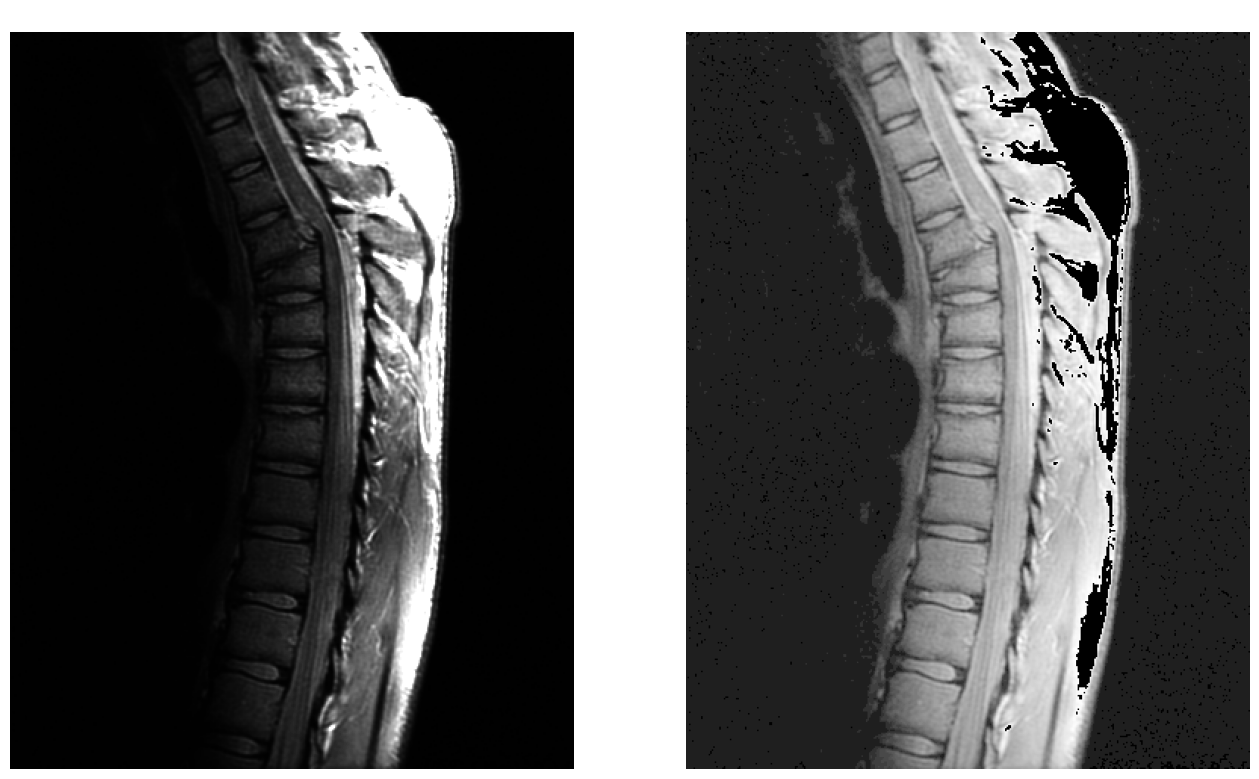

In [23]:

input_image = Image.open('spine.tif')


input_image = np.array(input_image.convert('L'), dtype=np.uint8)


c = 255 / np.log(1 + np.max(input_image))


log_transformed_image = c * (np.log(input_image + 1))
log_transformed_image = np.array(log_transformed_image, dtype=np.uint8)


plt.figure(figsize=(16, 12))
plt.subplot(1, 2, 1)
plt.imshow(input_image, cmap='gray')
plt.axis('off')
plt.title('Original', color='white')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(log_transformed_image, cmap='gray')
plt.axis('off')
plt.title('Log Transformation', color='white')
plt.xticks([])
plt.yticks([])
plt.show()

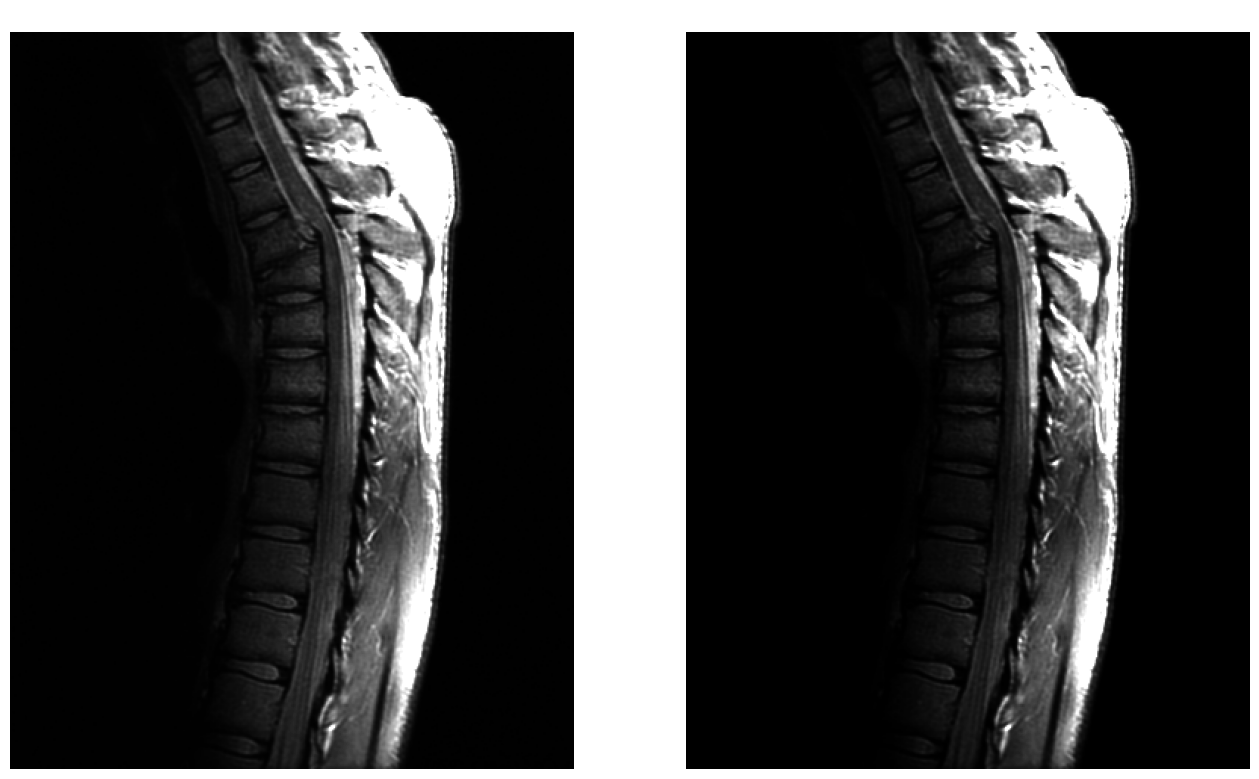

In [24]:



input_image = Image.open('spine.tif')


input_image = np.array(input_image.convert('L'), dtype=np.uint8)


gamma = 1.2

gamma_corrected_image = np.array(255 * (input_image / 255) ** gamma, dtype='uint8')


plt.figure(figsize=(16, 12))
plt.subplot(1, 2, 1)
plt.imshow(input_image, cmap='gray')
plt.axis('off')
plt.title('Original', color='white')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(gamma_corrected_image, cmap='gray')
plt.axis('off')
plt.title('Power-law Transformation', color='white')
plt.xticks([])
plt.yticks([])
plt.show()

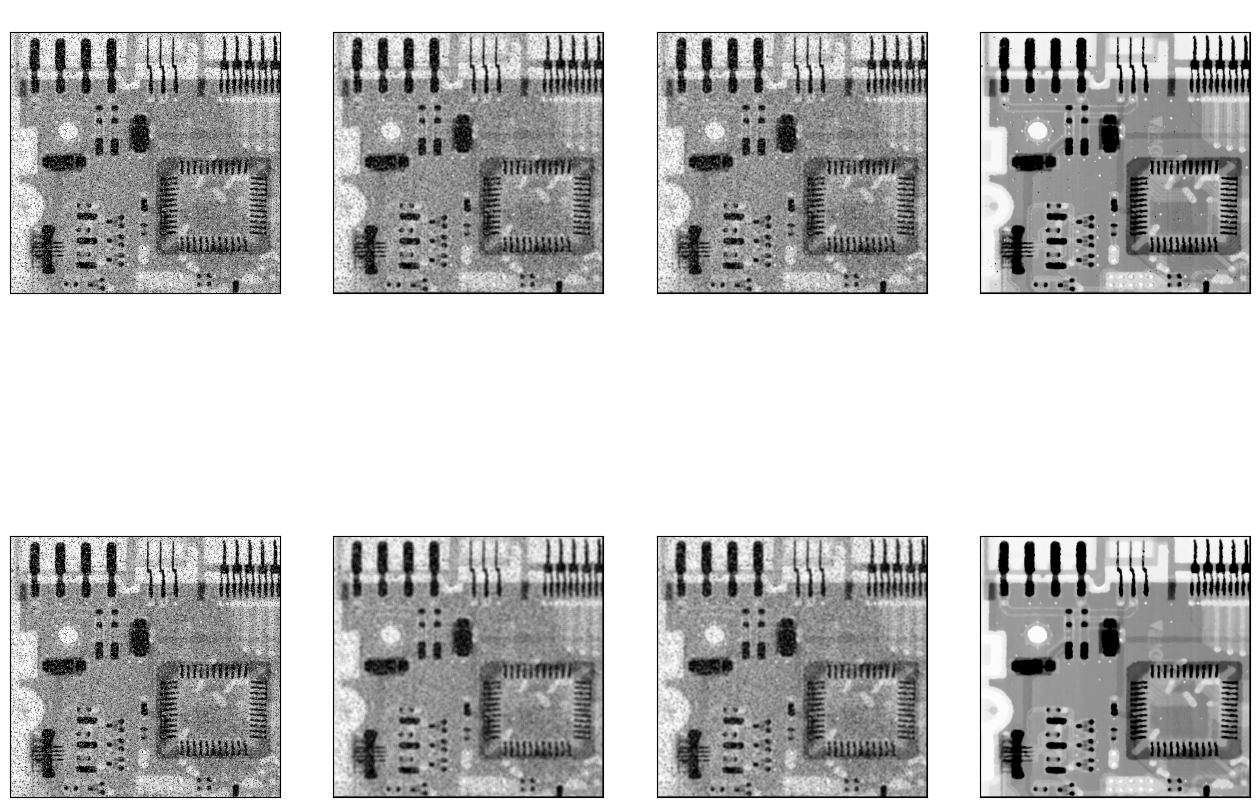

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def apply_average_filter(image, filter_):
    img_array = np.array(image.convert('L'))
    img_height, img_width = img_array.shape[0], img_array.shape[1]
    filter_size = filter_.shape[0]
    result_height, result_width = (img_height - filter_size) + 1, (img_width - filter_size) + 1
    result = np.zeros((result_height, result_width))

    for i in range(img_height - filter_size):
        for j in range(img_width - filter_size):
            temp = img_array[i:i + filter_size, j:j + filter_size]
            ans = np.multiply(temp, filter_).mean()
            result[i, j] = ans

    return result

def apply_median_filter(image, filter_size):
    img_array = np.array(image.convert('L'))
    img_height, img_width = img_array.shape[0], img_array.shape[1]
    result_height, result_width = (img_height - filter_size) + 1, (img_width - filter_size) + 1
    result = np.zeros((result_height, result_width))

    for i in range(img_height - filter_size):
        for j in range(img_width - filter_size):
            temp = img_array[i:i + filter_size, j:j + filter_size]
            ans = np.median(temp)
            result[i, j] = ans

    return result

input_image = Image.open('noise.tif')

filter_3 = np.ones((3, 3))
filter_5 = np.ones((5, 5))

filter_weight_3 = np.array([[1, 2, 1],
                            [2, 4, 2],
                            [1, 2, 1]])

filter_weight_5 = np.array([[1, 1, 2, 1, 1],
                            [1, 2, 3, 2, 1],
                            [2, 3, 4, 3, 2],
                            [1, 2, 3, 2, 1],
                            [1, 1, 2, 1, 1]])

result_3 = apply_average_filter(input_image, filter_3)
result_weighted_3 = apply_average_filter(input_image, filter_weight_3)
result_5 = apply_average_filter(input_image, filter_5)
result_weighted_5 = apply_average_filter(input_image, filter_weight_5)
result_median_3 = apply_median_filter(input_image, 3)
result_median_5 = apply_median_filter(input_image, 5)

plt.figure(figsize=(16, 12))
plt.subplot(2, 4, 1)
plt.imshow(np.array(input_image.convert('L')), cmap='gray')
plt.title('Original', color='white')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 4, 2)
plt.imshow(result_3, cmap='gray')
plt.title('Filtered (3x3 Average)', color='white')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 4, 3)
plt.imshow(result_weighted_3, cmap='gray')
plt.title('Filtered (3x3 Weighted Average)', color='white')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 4, 4)
plt.imshow(result_median_3, cmap='gray')
plt.title('Filtered (3x3 Median)', color='white')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 4, 5)
plt.imshow(np.array(input_image.convert('L')), cmap='gray')
plt.title('Original', color='white')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 4, 6)
plt.imshow(result_5, cmap='gray')
plt.title('Filtered (5x5 Average)', color='white')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 4, 7)
plt.imshow(result_weighted_5, cmap='gray')
plt.title('Filtered (5x5 Weighted Average)', color='white')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 4, 8)
plt.imshow(result_median_5, cmap='gray')
plt.title('Filtered (5x5 Median)', color='white')
plt.xticks([])
plt.yticks([])

plt.show()


([], [])

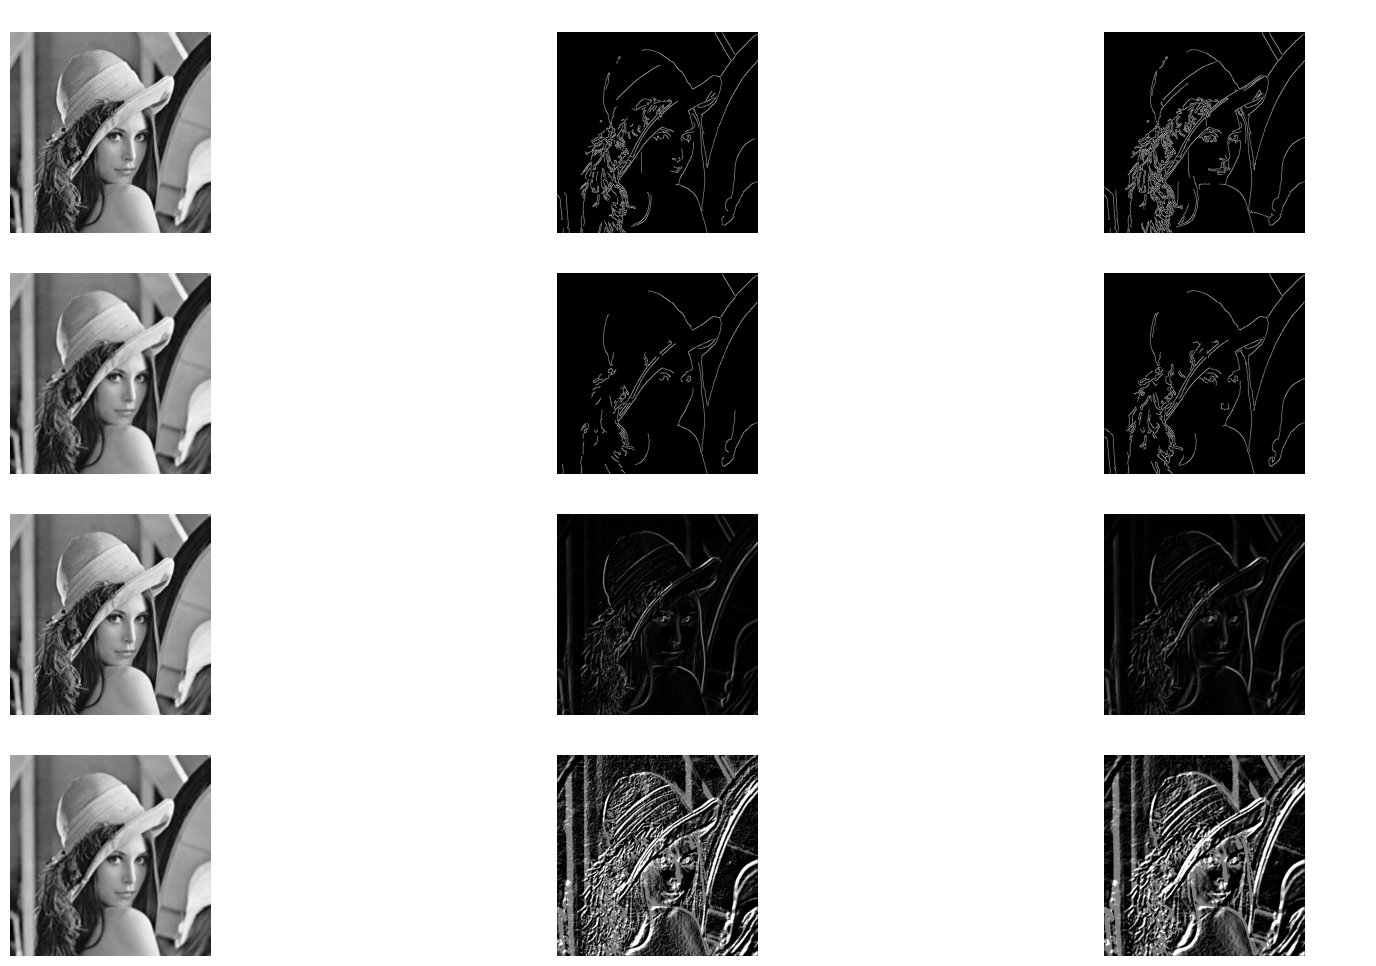

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def apply_gaussian_blur(image, kernel_size, sigma):
    blurred_image = cv2.GaussianBlur(image, kernel_size, sigma)
    return blurred_image

def apply_canny_edge_detection(image, threshold1, threshold2):
    edges = cv2.Canny(image, threshold1, threshold2)
    return edges

def apply_sobel_operator(image, ksize):
    edges_x = cv2.Sobel(image, -1, 1, 0, ksize=ksize)
    edges_y = cv2.Sobel(image, -1, 0, 1, ksize=ksize)
    edges = cv2.addWeighted(edges_x, 0.5, edges_y, 0.5, 0)
    return edges

input_image = Image.open('Lenna.png')
input_image = np.array(input_image.convert('L'), dtype=np.uint8)

gaussian1 = apply_gaussian_blur(input_image, (3, 3), 5)
c_edges11 = apply_canny_edge_detection(gaussian1, 100, 200)
c_edges12 = apply_canny_edge_detection(gaussian1, 50, 180)

gaussian2 = apply_gaussian_blur(input_image, (5, 5), 5)
c_edges21 = apply_canny_edge_detection(gaussian2, 100, 200)
c_edges22 = apply_canny_edge_detection(gaussian2, 50, 180)

s_edges11 = apply_sobel_operator(gaussian1, 3)
s_edges12 = apply_sobel_operator(gaussian2, 3)
s_edges21 = apply_sobel_operator(gaussian1, 5)
s_edges22 = apply_sobel_operator(gaussian2, 5)

plt.figure(figsize=(20, 12))
plt.subplot(4, 3, 1)
plt.imshow(gaussian1, cmap='gray')
plt.axis('off')
plt.title('gaussian 3*3 Mu=5', color='white')
plt.xticks([])
plt.yticks([])

plt.subplot(4, 3, 2)
plt.imshow(c_edges11, cmap='gray')
plt.axis('off')
plt.title('canny threshold1=100, threshold2=200', color='white')
plt.xticks([])
plt.yticks([])

plt.subplot(4, 3, 3)
plt.imshow(c_edges12, cmap='gray')
plt.axis('off')
plt.title('canny threshold1=50, threshold2=180', color='white')
plt.xticks([])
plt.yticks([])

plt.subplot(4, 3, 4)
plt.imshow(gaussian2, cmap='gray')
plt.axis('off')
plt.title('gaussian 5*5 Mu=5', color='white')
plt.xticks([])
plt.yticks([])

plt.subplot(4, 3, 5)
plt.imshow(c_edges21, cmap='gray')
plt.axis('off')
plt.title('canny threshold1=100, threshold2=200', color='white')
plt.xticks([])
plt.yticks([])

plt.subplot(4, 3, 6)
plt.imshow(c_edges22, cmap='gray')
plt.axis('off')
plt.title('canny threshold1=50, threshold2=180', color='white')
plt.xticks([])
plt.yticks([])

plt.subplot(4, 3, 7)
plt.imshow(gaussian1, cmap='gray')
plt.axis('off')
plt.title('gaussian 3*3 Mu=5', color='white')
plt.xticks([])
plt.yticks([])

plt.subplot(4, 3, 8)
plt.imshow(s_edges11, cmap='gray')
plt.axis('off')
plt.title('sobel ksize=3', color='white')
plt.xticks([])
plt.yticks([])

plt.subplot(4, 3, 9)
plt.imshow(s_edges12, cmap='gray')
plt.axis('off')
plt.title('sobel ksize=3', color='white')
plt.xticks([])
plt.yticks([])

plt.subplot(4, 3, 10)
plt.imshow(gaussian2, cmap='gray')
plt.axis('off')
plt.title('gaussian 5*5 Mu=5', color='white')
plt.xticks([])
plt.yticks([])

plt.subplot(4, 3, 11)
plt.imshow(s_edges21, cmap='gray')
plt.axis('off')
plt.title('sobel ksize=5', color='white')
plt.xticks([])
plt.yticks([])

plt.subplot(4, 3, 12)
plt.imshow(s_edges22, cmap='gray')
plt.axis('off')
plt.title('sobel ksize=5', color='white')
plt.xticks([])
plt.yticks([])
